In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import style
style.use('seaborn-white')
sns.set_style({'axes.grid': False})
%matplotlib notebook

In [3]:
Ames = pd.read_csv("/Users/dauku/Desktop/Courses/Machinelearning/Ameshouse/house-prices-advanced-regression-techniques/train.csv")

In [4]:
Saleprice = np.array(Ames.SalePrice, dtype=np.float64).reshape(len(Ames), 1)
Lotarea = np.array(Ames.LotArea, dtype=np.float64).reshape(len(Ames), 1)
Ones = np.ones([len(Ames), 1])
Ones = np.array(Ones, dtype=np.float64)
m = len(Ames)

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_SalePrice = scaler.fit_transform(Saleprice)
scaled_Lotarea = scaler.fit_transform(Lotarea)

#### Histogram

(array([1.423e+03, 2.400e+01, 8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.92372923,  1.22047101,  3.36467125,  5.50887149,  7.65307173,
         9.79727196, 11.9414722 , 14.08567244, 16.22987268, 18.37407292,
        20.51827316]),
 <a list of 10 Patch objects>)

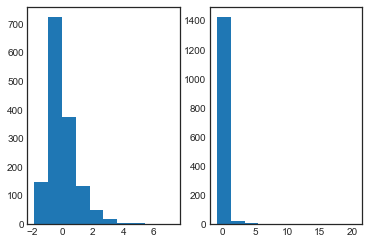

In [6]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(scaled_SalePrice)
ax[1].hist(scaled_Lotarea)

In [7]:
X = np.hstack([Ones, Lotarea])
Y = Saleprice

In [8]:
X = np.hstack([Ones, scaled_Lotarea])
Y = scaled_SalePrice

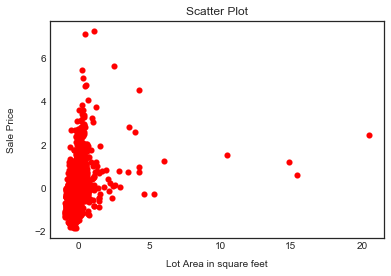

In [9]:
fig, ax = plt.subplots()
ax.scatter(X[:, 1], Y, c = "r", linewidth = 0.1, label = "Lot Area")

ax.set_title("Scatter Plot")
ax.set_xlabel("Lot Area in square feet")
ax.set_ylabel("Sale Price")
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

# ax.legend()
plt.show()

In [10]:
Y.shape

(1460, 1)

## Analytical Solution

#### The Normal Equations: $X^{\intercal}X\beta=X^{\intercal} \Rightarrow \beta=(X^{\intercal}X)^{-1}X^{\intercal}Y$

In [11]:
NE = np.linalg.inv(X.T@X)@X.T@Y
NE

array([[1.33573708e-16],
       [2.63843354e-01]])

#### Visualize regression line

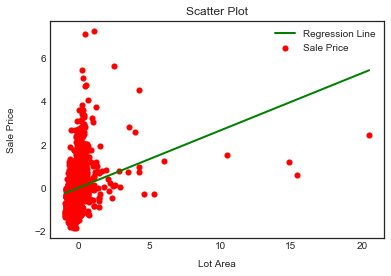

In [12]:
fig, ax = plt.subplots()

Xcoor = np.array([min(X[:, 1]), max(X[:, 1])]).reshape(2, 1)
Predicted = np.matmul(np.hstack([np.ones((2, 1)), Xcoor]), NE)

ax.scatter(X[:, 1], Y, c = "r", linewidth = 0.1, label = "Sale Price")
ax.plot(Xcoor, Predicted, c = "g", linewidth = 2, label = "Regression Line")
ax.set_title("Scatter Plot")
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sale Price")
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

ax.legend()
plt.show()

## 2.2 Gradient Descent

Cost function $J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

Hypothesis (Regression Function) $h_{\theta}(x) = \theta^{T}X = \theta_{0}+\theta_{1}x_{1}$

Update Rule $\theta_{j}:= \theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}$

#### Specify initial parameters and learning rate

In [13]:
iterations = 1500
alpha = 0.001
theta = np.array([0, -1.5], dtype=np.float64).reshape(2, 1)
theta

array([[ 0. ],
       [-1.5]])

#### Hypothesis (Regression function)

Predicted Value = $X\Theta^{T}$ = $\begin{bmatrix} 1&x_1 \\ 2&x_2 \\ 3&x_3 \\ \vdots&\vdots \\ m&x_m \end{bmatrix} * \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}$

#### Cost function (sum of square errors)

$J(\theta) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^{2} = \frac{1}{2m}\sum^{m}_{i=1}\left(\begin{bmatrix} 1&x_1 \\ 2&x_2 \\ 3&x_3 \\ \vdots&\vdots \\ m&x_m \end{bmatrix} * \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}-\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m\end{bmatrix}\right)^{\;\textbf{2}}$

#### Finding the optimal parameters using Gradient Descent

Update Rule $\theta_{j}:= \theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}$

$\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} := \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} - \alpha\frac{1}{m}\sum^{m}_{i=1}\Bigg\{\left(\begin{bmatrix} 1&x_1 \\ 2&x_2 \\ 3&x_3 \\ \vdots&\vdots \\ m&x_m \end{bmatrix}_{\;m*2} * \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}_{\;2*1}- \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m\end{bmatrix}_{\;m*1}\right)^\intercal*\begin{bmatrix} 1&x_1 \\ 2&x_2 \\ 3&x_3 \\ \vdots&\vdots \\ m&x_m\end{bmatrix}_{\;m*2}\Bigg\}$

In [14]:
prediction = np.matmul(X, theta)
error = prediction - Y
temp = np.matmul(X.T, error)
theta1 = theta - (temp*alpha/m)
theta1

array([[-1.21668277e-21],
       [-1.49823616e+00]])

In [15]:
# define a function to calculate Cost Function J(theta)

def Cost(X, Y, theta):
    cost = np.sum((np.matmul(X, theta) - Y)**2)/(2*m)
    return(cost)

Cost(X, Y, theta)

2.0207650308071083

In [16]:
def GradientDescent(X, Y, theta, alpha, iterations):
    CostList = []
    theta0hist = []
    theta1hist = []
    Matrix = np.zeros((2, iterations))
    for i in range(iterations):
        prediction = np.matmul(X, theta)
        error = prediction - Y
        temp = np.matmul(X.T, error)
        theta = theta - (temp*alpha/m)
        theta0hist.append(theta[0][0])
        theta1hist.append(theta[1][0])
        CostList.append(Cost(X, Y, theta))
        Matrix[:, i] = theta.reshape(2)
    return(theta, CostList, theta0hist, theta1hist)

In [17]:
GradientResult = GradientDescent(X, Y, theta, 0.01, iterations)
GradientResult[0]  # Optimum theta
J_history_reg = GradientResult[1]
theta_0 = GradientResult[2]
theta_1 = GradientResult[3]

## 2D and 3D Contour Plot

In [18]:
T1, T2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
z = np.array([Cost(X, Y, np.array([t1, t2]).reshape(-1, 1)) for t1, t2 in zip(np.ravel(T1), np.ravel(T2))])
z = z.reshape(T1.shape)

<IPython.core.display.Javascript object>


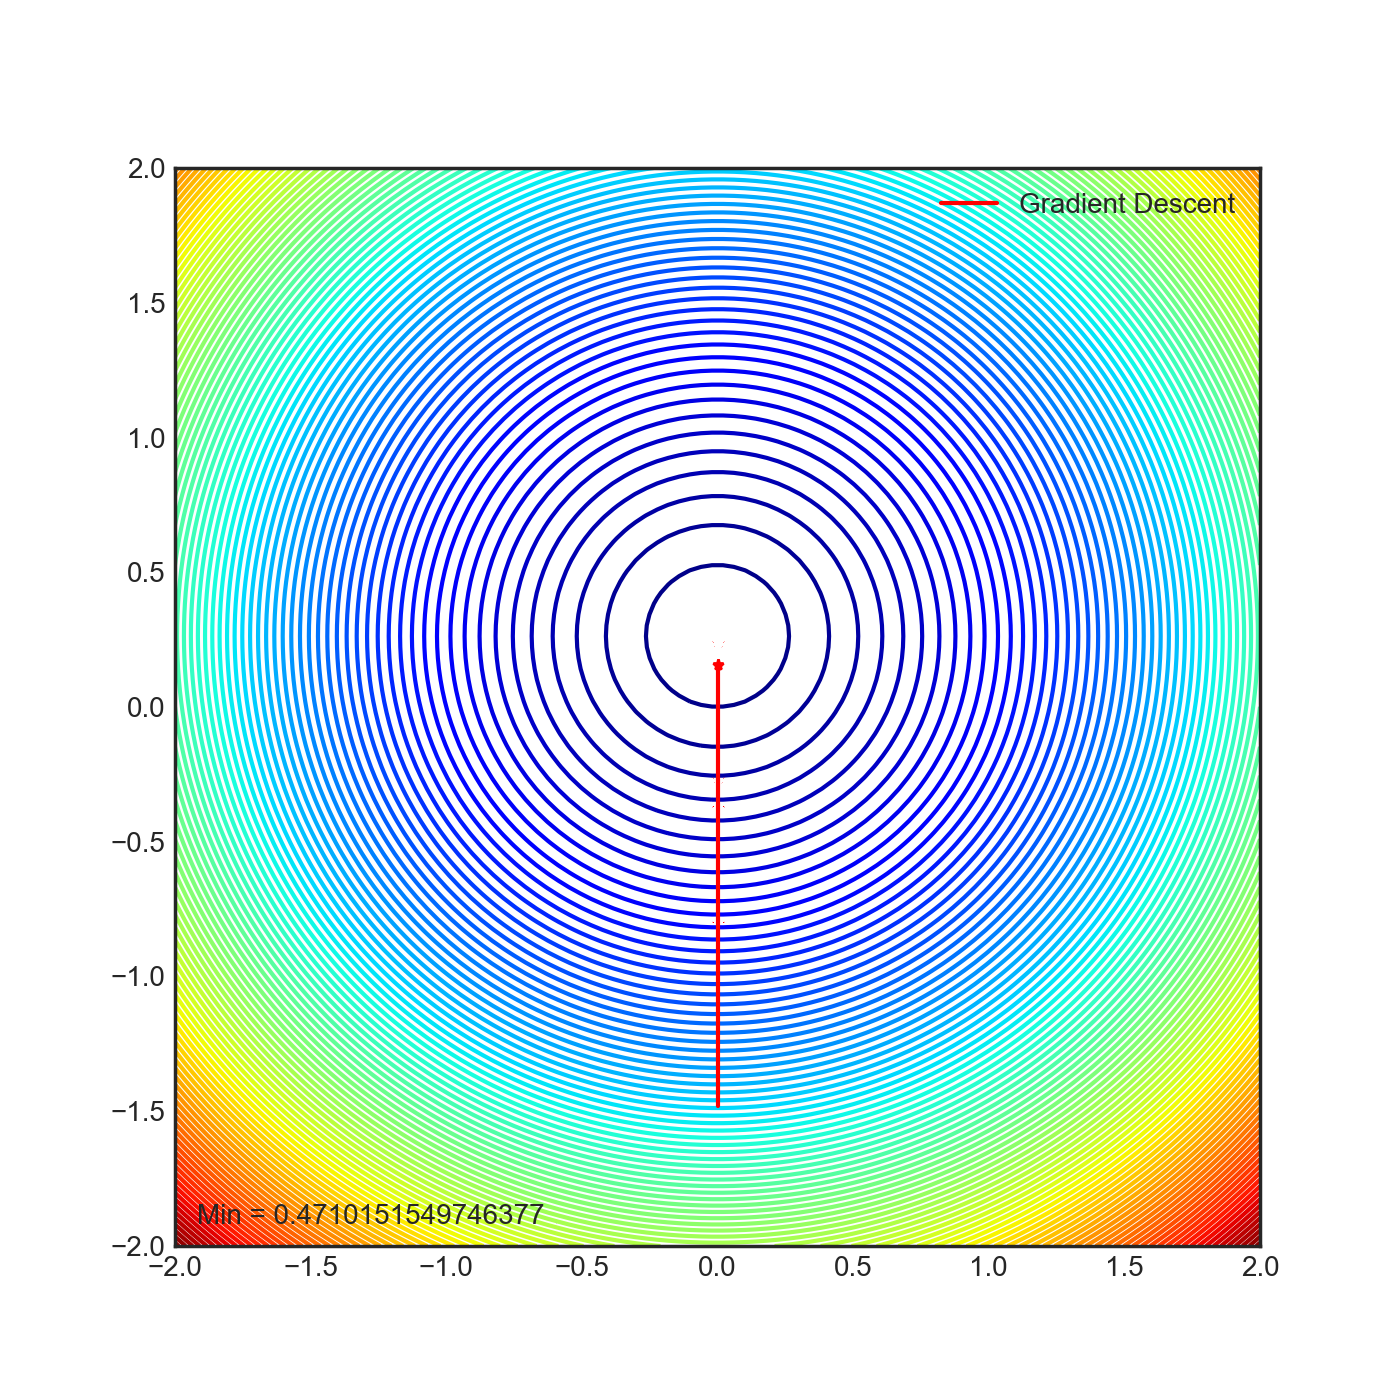

In [24]:
# plot the contour
fig1, ax1 = plt.subplots(figsize = (7, 7))
ax1.contour(T1, T2, z, 100, cmap = "jet")
plt.show()

# Create animation
line, = ax1.plot([], [], "r", label = "Gradient Descent", lw = 1.5)
point, = ax1.plot([], [], "*", color = "red", markersize = 4)
value_display = ax1.text(0.02, 0.02, " ", transform = ax1.transAxes)

def init_1():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text(" ")
    
    return line, point, value_display

def animate_1(i):
    # Animate line
    line.set_data(theta_0[:i], theta_1[:i])
    
    # Animate points
    point.set_data(theta_0[i], theta_1[i])
    
    # Animate value display
    value_display.set_text("Min = " + str(J_history_reg[i]))
    
    return line, point, value_display

ax1.legend(loc = 1)

anim1 = FuncAnimation(fig1, animate_1, init_func = init_1, frames = len(theta_0), interval = 10, repeat_delay = 60, blit = True)

plt.show()

<IPython.core.display.Javascript object>


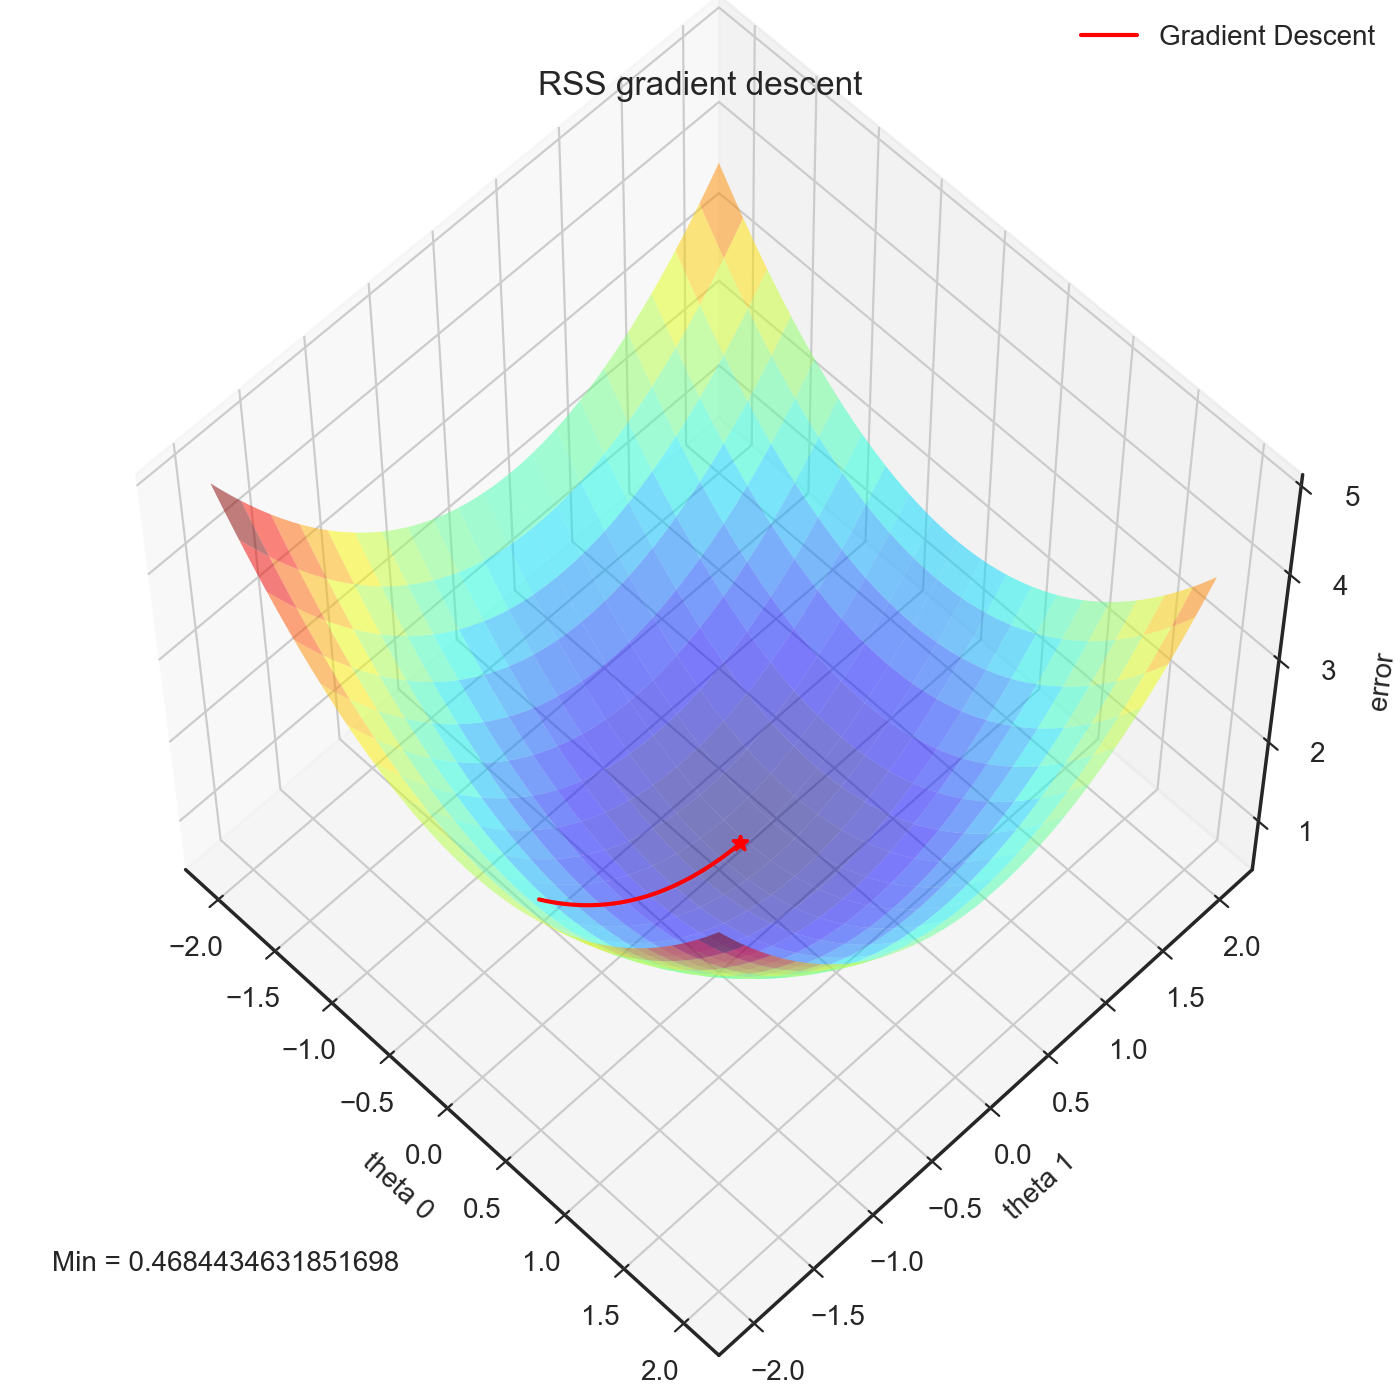

In [23]:
# plot 3D contour
fig2 = plt.figure(figsize = (7, 7))
ax2 = Axes3D(fig2)

# Surface plot
ax2.plot_surface(T1, T2, z, rstride = 5, cstride = 5, cmap = "jet", alpha = 0.5)

ax2.set_xlabel("theta 0")
ax2.set_ylabel("theta 1")
ax2.set_zlabel("error")
ax2.set_title("RSS gradient descent")
ax2.view_init(60, -45)

# Create animation
line, = ax2.plot([], [], [], "r-", label = "Gradient Descent", lw = 1.5)
point, = ax2.plot([], [], [], "*", color = "red")
display_value = ax2.text(1., 1., 10, " ", transform = ax2.transAxes)

def init_2():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    display_value.set_text(" ")
    return line, point, display_value

def animate_2(i):
    # Animate line
    line.set_data(theta_0[:i], theta_1[:i])
    line.set_3d_properties(J_history_reg[:i])
    
    # Animate points
    point.set_data(theta_0[i], theta_1[i])
    point.set_3d_properties(J_history_reg[i])
    
    # Animate display value
    display_value.set_text("Min = " + str(J_history_reg[i]))
    
    return line, point, display_value

ax2.legend(loc = 1)

anim2 = FuncAnimation(fig2, animate_2, init_func = init_2, frames = len(theta_0), interval = 10, repeat_delay = 60, blit = True)

plt.show()